In [98]:
import numpy as np
import math

In [99]:
def f(x):
    return 3*x**2 - 4*x + 5

x = np.arange(-5,5,0.25)

y = f(x)
y

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

In [100]:
import matplotlib.pyplot as plt

In [101]:
#plt.plot(x,y)

In [102]:
f(5.0)

60.0

In [103]:
# derivative means senstive of function in that point, bigger positive means slope x a little distance makes fucntion become bigger
h = 0.01
a=3.0
def dx(a):
    return (f(a+h)-f(a))/h
dx(a)

14.029999999999632

In [104]:
a=-3.0
dx(a)

-21.9699999999996

In [105]:
dx(2/3)

0.02999999999997449

In [106]:
h = 0.001

#inputs
a=2.0
b=-3.0
c=10.0

d1 = a*b+c
a+=h
d2 = a*b+c
print("d1:",d1)
print("d2:",d2)
print("slop:",(d2-d1)/h)

d1: 4.0
d2: 3.997
slop: -3.0000000000001137


In [107]:
class Value:
    def __init__(self,data,_children=(),_op="",label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad=0
    # help print something better
    def __repr__(self):
        return f"Value(data={self.data})"
    # override operation + ,it will use a.__add__(b)
    def __add__(self,other):
        if(isinstance(other,float)):
            return Value(self.data+other,(self,other),"+")
        return Value(self.data+other.data,(self,other),"+")
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),"*")
        

In [108]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
print(f"a+b = {a+b}")
print(f"a*b = {a*b}")
c = Value(c,label="c")
e = a*b
e.label = "e"
d = e+c
d.label = 'd'
f = Value(-2.0,label="f")
L = f*d
L.label = "L"
print(f"a*b+c = d={d}")
z = Value(a)+Value(b)
print(f"{z._prev}")
print(f"{z._op}")

a+b = Value(data=-1.0)
a*b = Value(data=-6.0)
a*b+c = d=Value(data=4.0)
{Value(data=Value(data=2.0)), Value(data=Value(data=-3.0))}
+


In [109]:
import os
# print(os.environ)
# 手动增加环境变量
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [110]:
# pip install graphviz
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.2f }" % (n.label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

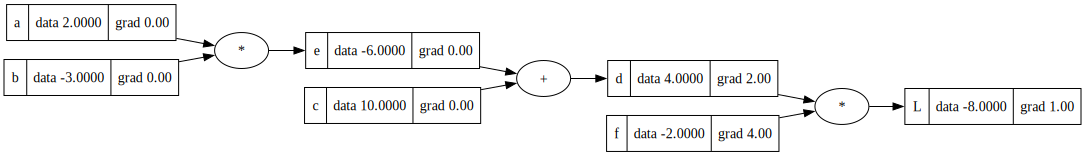

In [113]:
draw_dot(L)

In [112]:
h = 0.001
derivative_f = ((f.data+h)*d.data - f.data*d.data)/h
print(f"derivate dL/df = {derivative_f}")
L.grad = 1
f.grad = 4
d.grad = 2


derivate dL/df = 3.9999999999995595
